## **TOMATO LEAVES CLASSIFICATION OF HEALTHY VS INFECTED USING MACHINE LEARNING AND IMAGE PROCESSING**

## By Niyati Jain
## 189301051

In [ ]:
import pickle
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2DGGGG
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np
from skimage.feature import greycomatrix, greycoprops
from skimage import io, color, img_as_ubyte
from imageio import imread, imsave
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

**IMPORTING DATASET**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Shape: (256, 256, 3)


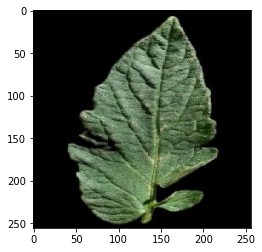

In [ ]:
img = io.imread('/content/Tomato_healthy_110.jpg')
print("Shape: {}".format(img.shape))
plt.imshow(img)

In [ ]:
%cd /content/drive/MyDrive/Dataset

/content/drive/MyDrive/Dataset


In [ ]:
!ls Dataset

Test_Set  Training_Set


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255)

In [ ]:
batchsize = 5
train_data = datagen.flow_from_directory('Dataset/Training_Set', target_size=(224,224), batch_size=batchsize, class_mode='categorical')

Found 140 images belonging to 2 classes.


In [ ]:
test_data = datagen.flow_from_directory('Dataset/Test_Set', target_size=(224,224), batch_size=batchsize, class_mode='categorical', shuffle=False)

Found 60 images belonging to 2 classes.


In [ ]:
np_image_list = np.array(test_data, dtype=np.float16) / 225.0

## **FEATURE EXTRACTION**

**GRAY LEVEL CO-OCCURENCE MATRIX**

In [ ]:
cs = []
ds = []
hg = []
ef = []
co = []
asm = []

gray = color.rgb2gray(img)
image = img_as_ubyte(gray)

bins = np.array([0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 255]) #16-bit
inds = np.digitize(image, bins)

max_value = inds.max()+1
matrix_coocurrence = greycomatrix(inds, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=max_value, normed=False, symmetric=False)

""""
[1] : array_like of uint8
Integer typed input image. The image will be cast to uint8, so the maximum value must be less than 256.

0 : array_like
List of pixel pair distance offsets.

np.pi/2 : array_like
List of pixel pair angles in radians.

levels : int, optional
The input image should contain integers in [0, levels-1], where levels indicate the number of grey-levels counted (typically 256 for an 8-bit image). The maximum value is 256.

symmetric : bool, optional
If True, the output matrix P[:, :, d, theta] is symmetric. This is accomplished by ignoring the order of value pairs, so both (i, j) and (j, i) are accumulated when (i, j) is encountered for a given offset. The default is False.

normed : bool, optional
If True, normalize each matrix P[:, :, d, theta] by dividing by the total number of accumulated co-occurrences for the given offset. The elements of the resulting matrix sum to 1. The default is False.
"""""

def contrast_feature(matrix_coocurrence):
      contrastFeature = greycoprops(matrix_coocurrence, 'contrast')
      contrastFeature = np.ravel(contrastFeature)
      cs.append(contrastFeature[0])
      return cs
           
def dissimilarity_feature(matrix_coocurrence):
      dissimilarityFeature = greycoprops(matrix_coocurrence, 'dissimilarity')
      dissimilarityFeature = np.ravel(dissimilarityFeature)
      ds.append(dissimilarityFeature[0])
      return ds
            
def homogeneity_feature(matrix_coocurrence):
      homogeneityFeature = greycoprops(matrix_coocurrence, 'homogeneity')
      homogeneityFeature = np.ravel(homogeneityFeature)
      hg.append(homogeneityFeature[0])
      return hg
    
def energy_feature(matrix_coocurrence):
      energyFeature = greycoprops(matrix_coocurrence, 'energy')
      energyFeature = np.ravel(energyFeature)
      ef.append(energyFeature[0])
      return ef
    
def correlation_feature(matrix_coocurrence):
      correlationFeature = greycoprops(matrix_coocurrence, 'correlation')
      correlationFeature = np.ravel(correlationFeature)
      co.append(correlationFeature[0])
      return co
            
def asm_feature(matrix_coocurrence):
      asmFeature = greycoprops(matrix_coocurrence, 'ASM')
      asmFeature = np.ravel(asmFeature)
      asm.append(asmFeature[0])
      return asm


print(contrast_feature(matrix_coocurrence))
print(dissimilarity_feature(matrix_coocurrence))
print(homogeneity_feature(matrix_coocurrence))
print(energy_feature(matrix_coocurrence))
print(correlation_feature(matrix_coocurrence))
print(asm_feature(matrix_coocurrence))

[1.1122855392156863]
[0.49353553921568627]
[0.8077309931686039]
[0.5748451073896755]
[0.9546476786317569]
[0.3304468974898476]


**COPYING THE OUTPUT VALUES TO MS-EXCEL**

In [ ]:
!pip install xlsxwriter


     |████████████████████████████████| 153kB 8.7MB/s 


In [ ]:
import xlsxwriter
workbook = xlsxwriter.Workbook('GLCM.xlsx')
worksheet = workbook.add_worksheet()
row=1
col=0

worksheet.write_column(row, col, cs)
worksheet.write_column(row, col+1, ds)
worksheet.write_column(row, col+2, hg)
worksheet.write_column(row, col+3, ef)
worksheet.write_column(row, col+4, co)
worksheet.write_column(row, col+5, asm)
    
workbook.close()

**COLOUR SPACING**

[array([0.35340071, 0.47069629, 0.40161221]),
 array([116.32680931, 168.3458285 , 117.01072594]),
 array([ 51.74203713, 105.02205631,  47.42585109]),
 array([185.0269837 , 203.5177665 , 152.63665509]),
 array([ 74.90731192, 128.34155433,  72.4785985 ]),
 array([138.71734836, 188.91629472, 137.79768786]),
 array([26.11860647, 65.73956159, 25.71503132]),
 array([ 95.71272893, 149.15615907,  96.26713071])]

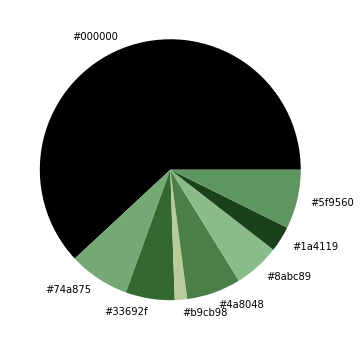

In [ ]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))
    
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

    """"
    we resize the image to the size 600 x 400.
    It is not required to resize it to a smaller size but we do so to lessen the pixels which’ll reduce the time needed to extract the colors from the image.
    KMeans expects the input to be of two dimensions, so we use Numpy’s reshape function to reshape the image data.
    """"
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

get_colors(get_image('/TL_LateBlight.jpg'), 8, True)

**COLOUR SPACING-HISTOGRAM EQUALISATION**

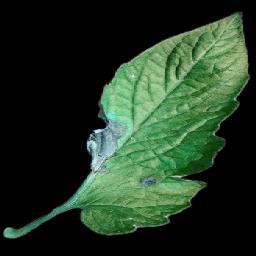

-1

In [ ]:
from google.colab.patches import cv2_imshow
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Histogram equalisation on the V-channel
img_hsv[:, :, 2] = cv2.equalizeHist(img_hsv[:, :, 2])

# convert image back from HSV to RGB
image = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

cv2_imshow(img)
cv2.waitKey(0)

# **CLASSIFICATION**

In [ ]:
import pickle
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np
from skimage.feature import greycomatrix, greycoprops
from skimage import io, color, img_as_ubyte
from imageio import imread, imsave
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [ ]:
import pandas as pd
excelfile=pd.ExcelFile('/content/H+I_Train.xlsx')
df=excelfile.parse('Sheet1')  
df.head()

,contrast,dissimliarity,homogeneity,energy,correlation,asm,class
0,0.709651,0.360018,0.852178,0.628507,0.972712,0.395021,1
1,0.533456,0.290472,0.877244,0.635964,0.983725,0.404450,1
2,0.371844,0.250797,0.886294,0.623686,0.980690,0.388984,1
3,0.450735,0.275521,0.878340,0.556429,0.979836,0.309613,1
4,0.313450,0.222028,0.897869,0.629238,0.975372,0.395941,1


In [ ]:
X_train = df.drop(['class'], axis=1)
y_train = df['class']

In [ ]:
excelfile=pd.ExcelFile('/content/H+I_Test.xlsx')
df2=excelfile.parse('Sheet1')  
X_test = df2.drop(['class'], axis=1)
y_test = df2['class']

**K-NEAREST NEIGHBOURS**

CHECKING THE OPTIMUM K VALUE

In [ ]:
from sklearn.cluster import KMeans
wcss = [] #Within Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

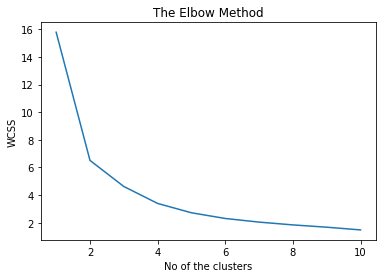

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No of the clusters')
plt.ylabel('WCSS')

plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
#Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

TP = cm[0][0] # True Positives 
TN = cm[1][1] # True Negatives
FP = cm[0][1] # False Positives 
FN = cm[1][0] # False Negatives 

# ACCURACY
#formula = (TP + TN) / total

accuracy = ((TP + TN) / len(X_test)) * 100
print('Accuracy is : ', accuracy, '%')

Accuracy is :  73.33333333333333 %


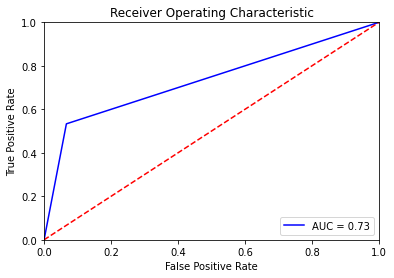

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# F1 ACCURACY
#Formula = 2(TP) / (2(TP) + FP + FN)
F1 = (2 * TP) / ((2 * TP) + FP + FN) * 100
print('F1 measure = ', F1, '%')


F1 measure =  77.77777777777779 %


In [ ]:
# MCC ACCURACY (Matthews Correlation Coefficient)
import math
denominator = (TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)
den = math.sqrt(denominator)
num = (TP * TN) - (FP * FN)
MCC = (num / den) * 100
print('MCC Accuracy = ' , MCC, '%')

MCC Accuracy =  50.91750772173156 %


**RANDOM FOREST**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 5, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
#Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

TP = cm[0][0] # True Positives 
TN = cm[1][1] # True Negatives
FP = cm[0][1] # False Positives 
FN = cm[1][0] # False Negatives 

# ACCURACY
#formula = (TP + TN) / total

accuracy = ((TP + TN) / len(X_test)) * 100
print('Accuracy is : ', accuracy, '%')


Accuracy is :  75.0 %


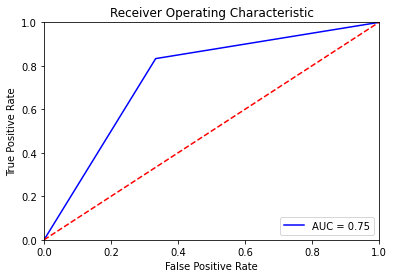

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# F1 ACCURACY
#Formula = 2(TP) / (2(TP) + FP + FN)
F1 = (2 * TP) / ((2 * TP) + FP + FN) * 100
print('F1 measure = ', F1, '%')


F1 measure =  72.72727272727273 %


In [ ]:
# MCC ACCURACY (Matthews Correlation Coefficient)
import math
denominator = (TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)
den = math.sqrt(denominator)
num = (TP * TN) - (FP * FN)
MCC = (num / den) * 100
print('MCC Accuracy = ' , MCC, '%')

MCC Accuracy =  50.709255283710995 %


**SUPPORT VECTOR MACHINE(KERNEL=RBF)**

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_pred = classifier.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

TP = cm[0][0] # True Positives 
TN = cm[1][1] # True Negatives
FP = cm[0][1] # False Positives 
FN = cm[1][0] # False Negatives 

# ACCURACY
#formula = (TP + TN) / total

accuracy = ((TP + TN) / len(X_test)) * 100
print('Accuracy is : ', accuracy, '%')

Accuracy is :  80.0 %


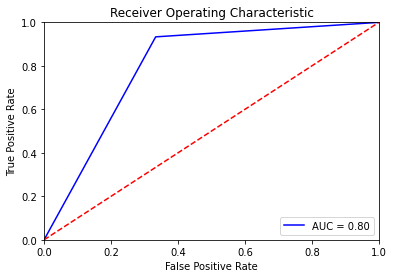

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# F1 ACCURACY
#Formula = 2(TP) / (2(TP) + FP + FN)
F1 = (2 * TP) / ((2 * TP) + FP + FN) * 100
print('F1 measure = ', F1, '%')

F1 measure =  76.92307692307693 %


In [ ]:
# MCC ACCURACY (Matthews Correlation Coefficient)
import math
denominator = (TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)
den = math.sqrt(denominator)
num = (TP * TN) - (FP * FN)
MCC = (num / den) * 100
print('MCC Accuracy = ' , MCC, '%')

MCC Accuracy =  62.25430174794672 %


**NAIVE BAYES ALGORITHM**

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

TP = cm[0][0] # True Positives 
TN = cm[1][1] # True Negatives
FP = cm[0][1] # False Positives 
FN = cm[1][0] # False Negatives 

# ACCURACY
#formula = (TP + TN) / total

accuracy = ((TP + TN) / len(X_test)) * 100
print('Accuracy is : ', accuracy, '%')

Accuracy is :  76.66666666666667 %


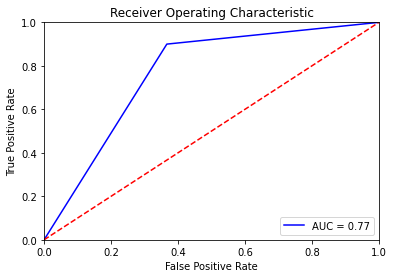

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# F1 ACCURACY
#Formula = 2(TP) / (2(TP) + FP + FN)
F1 = (2 * TP) / ((2 * TP) + FP + FN) * 100
print('F1 measure = ', F1, '%')

F1 measure =  73.07692307692307 %


In [ ]:
# MCC ACCURACY (Matthews Correlation Coefficient)
import math
denominator = (TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)
den = math.sqrt(denominator)
num = (TP * TN) - (FP * FN)
MCC = (num / den) * 100
print('MCC Accuracy = ' , MCC, '%')

MCC Accuracy =  55.337157109285975 %


**DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)


#Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

TP = cm[0][0] # True Positives 
TN = cm[1][1] # True Negatives
FP = cm[0][1] # False Positives 
FN = cm[1][0] # False Negatives 

# ACCURACY
#formula = (TP + TN) / total

accuracy = ((TP + TN) / len(X_test)) * 100
print('Accuracy is : ', accuracy, '%')

Accuracy is :  65.0 %


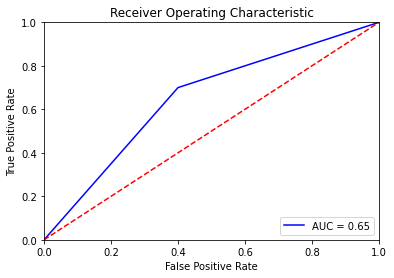

In [ ]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# F1 ACCURACY
#Formula = 2(TP) / (2(TP) + FP + FN)
F1 = (2 * TP) / ((2 * TP) + FP + FN) * 100
print('F1 measure = ', F1, '%')

F1 measure =  63.1578947368421 %


In [ ]:
# MCC ACCURACY (Matthews Correlation Coefficient)
import math
denominator = (TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)
den = math.sqrt(denominator)
num = (TP * TN) - (FP * FN)
MCC = (num / den) * 100
print('MCC Accuracy = ' , MCC, '%')

MCC Accuracy =  30.15113445777636 %
